<a href="https://colab.research.google.com/github/dookda/bualabs/blob/master/_cnn_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [4]:
# Load dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

11490434/11490434 [==============================] - 2s 0us/step
60000 60000
10000 10000
60000 60000
10000 10000


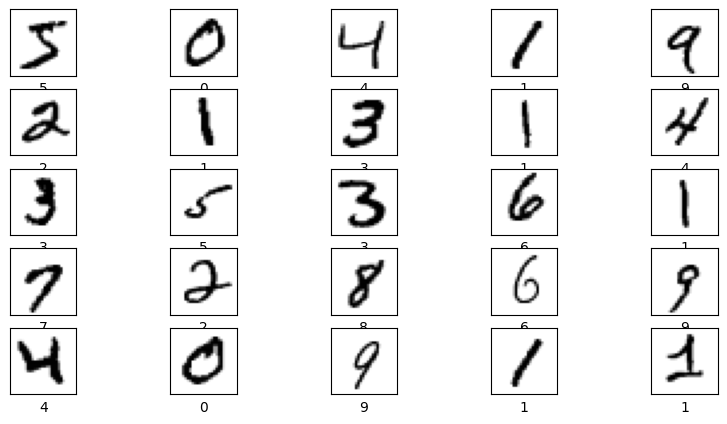

In [5]:
# Display sample images
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
Shape of single image: (28, 28)


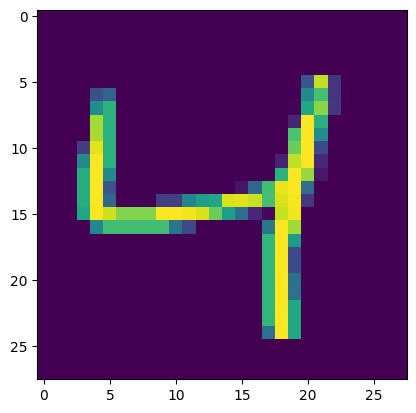

In [7]:
# Print shape of images
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Print shape of single image
print("Shape of single image:", X_train[0].shape)

# Visualize single image
plt.imshow(X_train[2])

In [ ]:
# Then extract weights from first conv layer
model = keras.Sequential()
conv_layer = model.layers[0]
weights = conv_layer.get_weights()[0]

fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(32):
    filt = weights[:,:,0,i]
    axs[i//8, i%8].imshow(filt)
    axs[i//8, i%8].set_title('Filter '+str(i))
    axs[i//8, i%8].axis('off')

plt.show()

In [10]:
# Define CNN Model
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

In [11]:
# Compile and Train model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

Epoch 1/5


2023-10-20 07:27:56.128768: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 10s 5ms/step - loss: 0.1612 - accuracy: 0.9517
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0529 - accuracy: 0.9839
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0389 - accuracy: 0.9881
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0293 - accuracy: 0.9901
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0236 - accuracy: 0.9926


In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0339 - accuracy: 0.9887
Test accuracy: 0.9886999726295471


(149, 107)
(28, 28)


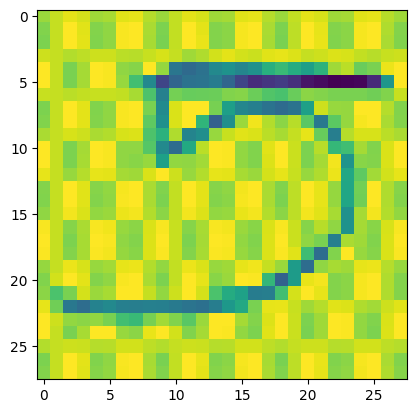

In [15]:
from PIL import Image
import numpy as np

# Load image
img = Image.open('test.png').convert('L')
print(img.size)
img = img.resize((28,28))
print(img.size)

# show image
plt.imshow(img)
plt.show()


In [16]:
# Load and preprocess new image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
new_img = load_img('test.png', target_size=(28, 28))
new_img = img_to_array(new_img)
new_img = new_img.reshape(1,28,28,1)
new_img = new_img / 255.0

# Make prediction
import numpy as np
prediction = model.predict(new_img)
digit = np.argmax(prediction)

print("Predicted Digit: ", digit)

ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.